# 線形回帰モデルのフルスクラッチ

今回は、線形回帰のモデルをライブラリを使わずに実装していきます。(numpyなどは使います)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%  matplotlib inline
from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings('ignore')

# データの読み込み

In [2]:
train=pd.read_csv("train.csv")
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [3]:
train.shape

(1460, 81)

In [4]:
train,test = train_test_split(train, test_size=0.2)
train.shape,test.shape

((1168, 81), (292, 81))

## 分布の仮定

正規化や標準化を行いたいが、それを行うためにはある種の分布の仮定が成立しているか確認する必要があるので、SalePriceとGrLivAreaについて分布を確認しておこう。

下記に左のグラフがなにも加工していない分布である。左に歪んでいるので、対数変換を施せば正規分布になることが容易に予想できる。

そして、対数変換を施したのが右側のグラフだ。元のグラフよりは正規分布に近いだろう。

以下では対数変換を施したあとのデータLogedSalePriceで扱っていくことにする。

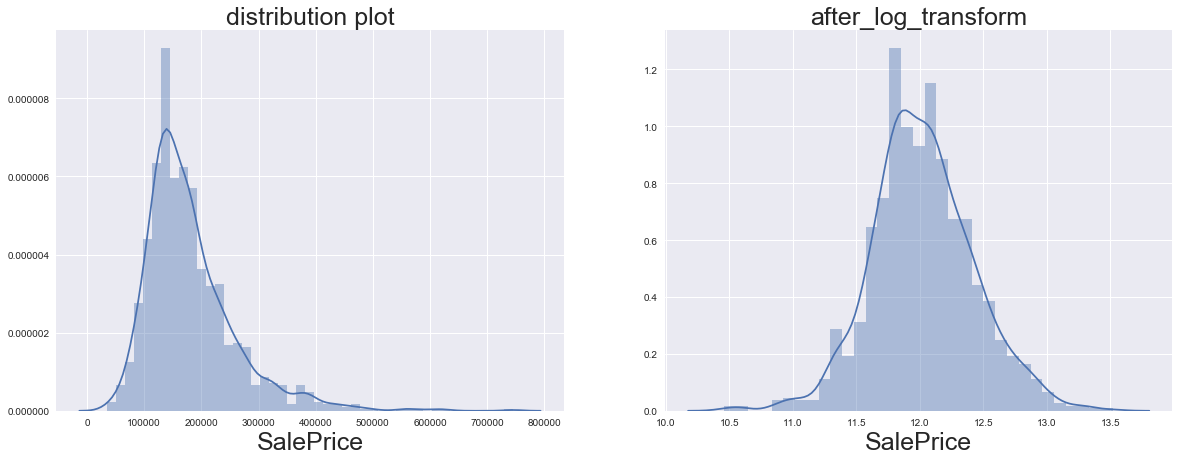

In [5]:
plt.figure(figsize=(20,7))

plt.subplot(1,2,1)
plt.title("distribution plot",fontsize = 25)
plt.xlabel("SalePrice",fontsize = 25)
sns.distplot(train["SalePrice"])


plt.subplot(1,2,2)
plt.title("after_log_transform",fontsize = 25)
SalePrice_log = np.log(train["SalePrice"])
plt.xlabel("LogedSalePrice",fontsize = 25)
sns.distplot(SalePrice_log)



同様に、GrLivAreaについても確認しておく。

左側が加工していないデータの分布、右側が対数変換を施した後のグラフである。

これについても、以下ではGrLivArea_logのデータのほうを扱っていくことにする。

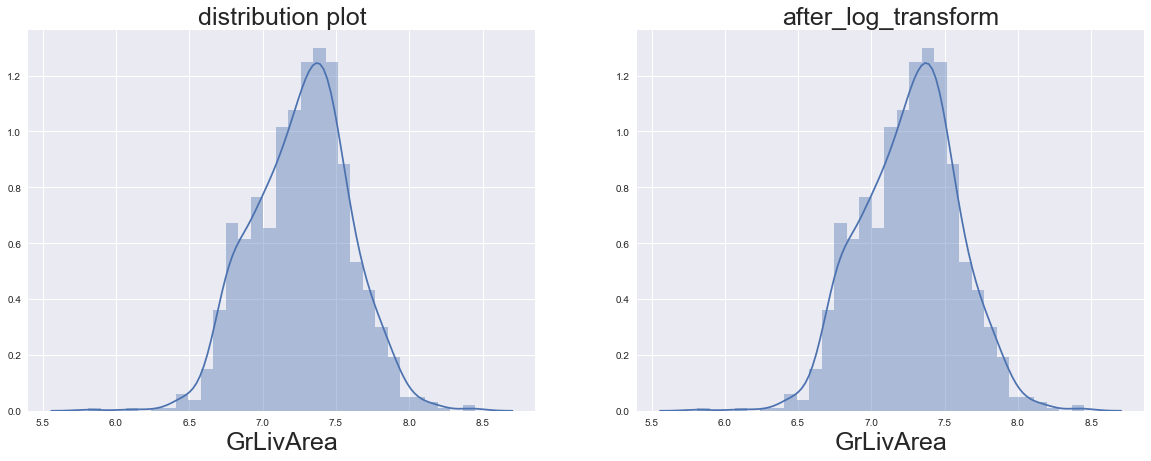

In [6]:
plt.figure(figsize=(20,7))

plt.subplot(1,2,1)
plt.title("distribution plot",fontsize = 25)
plt.xlabel("GrLivArea",fontsize = 25)
sns.distplot(np.log(train["GrLivArea"]))


plt.subplot(1,2,2)
GrLivArea_log = np.log(train["GrLivArea"])
plt.title("after_log_transform",fontsize = 25)
plt.xlabel("LogedGrLivArea",fontsize = 25)
sns.distplot(GrLivArea_log)

今確認したように、SalePrice_logやGrLivArea_logであれば正規分布に従っていそうだ、ということが確認できたので(厳密にはあれだけでは確認にはなっていませんが、今回は端折ります)それを正規化する。

In [7]:
test_SalePrice_log = np.log(test["SalePrice"])      # SalePrice の　test データの処理もここで行なっておく。 
test_GrLivArea_log = np.log(test["GrLivArea"])     # GrLivArea　の　test データの整形もここで行なっておく。　　


def normalization(X): 
        """
        Seriesを受け取って、標準化(平均0、分散1にする。)
        """
        
        norma = (X - X.mean()) / X.std()
        return norma

    
## 正規化済みのそれぞれのデータ
normalized_SalePrice_log = normalization(SalePrice_log).reset_index()
normalized_SalePrice_log = normalized_SalePrice_log.drop(["index"],axis=1)

normalized_GrLivArea_log = normalization(GrLivArea_log).reset_index()
normalized_GrLivArea_log = normalized_GrLivArea_log.drop(["index"],axis=1)



## SalePrice とGrLivAreaをまとめたデータ
Sales_and_Gr_log  = pd.concat([SalePrice_log,GrLivArea_log],axis=1).reset_index()
Sales_and_Gr_log  = Sales_and_Gr_log.drop(["index"],axis=1)

Sales_and_Gr_normalized = pd.concat([normalized_SalePrice_log,normalized_GrLivArea_log],axis=1).reset_index()
Sales_and_Gr_normalized = Sales_and_Gr_normalized.drop(["index"],axis=1)



## テストデータに対する処理。正規化はトレーニングデータの平均や標準偏差を用いて行う。

SalePrice_log_mean = SalePrice_log.mean()
GrLivArea_log_mean = GrLivArea_log.mean()
SalePrice_log_std = SalePrice_log.std()
GrLivArea_log_std= GrLivArea_log.std()


# 正規化はトレーニングデータの平均や標準偏差を用いて行う。
normalized_test_SalePrice_log = (test_SalePrice_log - SalePrice_log_mean) /  SalePrice_log_std 
normalized_test_SalePrice_log = normalized_test_SalePrice_log.reset_index().drop(["index"],axis=1)

normalized_test_GrLivArea_log = (test_GrLivArea_log - GrLivArea_log_mean ) / GrLivArea_log_mean 
normalized_test_GrLivArea_log = normalized_test_GrLivArea_log.reset_index().drop(["index"],axis=1)


### GrLivAreaとSalePriceに関する散布図

正規化を行なったあとのでデータで散布図をみてみよう。

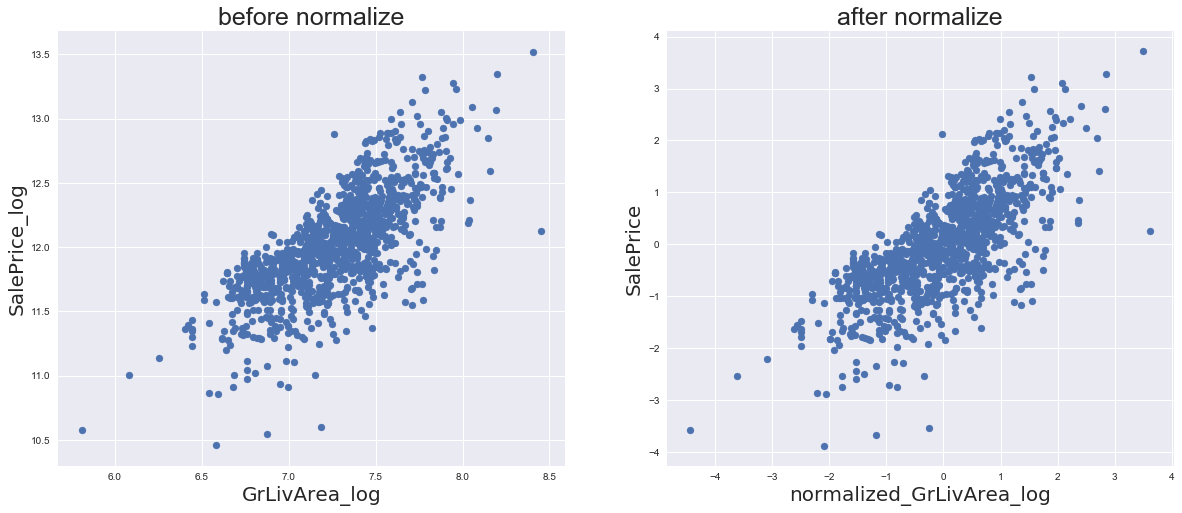

In [8]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title("before normalize",fontsize = 25)
plt.scatter("GrLivArea",'SalePrice',data=Sales_and_Gr_log)
plt.xlabel('GrLivArea_log',fontsize = 20, fontdict={'family': 'IPAPGothic'})
plt.ylabel('SalePrice_log',fontsize = 20, fontdict={'family': 'IPAPGothic'})


plt.subplot(1,2,2)
plt.title("after normalize",fontsize = 25)
plt.scatter("GrLivArea",'SalePrice',data=Sales_and_Gr_normalized)
plt.xlabel('normalized_GrLivArea_log',fontsize = 20, fontdict={'family': 'IPAPGothic'})
plt.ylabel('SalePrice',fontsize = 20, fontdict={'family': 'IPAPGothic'})


YearBuiltに関しても分布を確認しておこう。以下でわかるように、単峰型ではないため本来であればこのままで扱うべきではなく、何らかのグループわけをすることによって正規分布ではないにしても単峰型の分布にすることができるはずである。

しかしここではそれも一旦保留にしておく。正規化だけ行なっておくことにする。

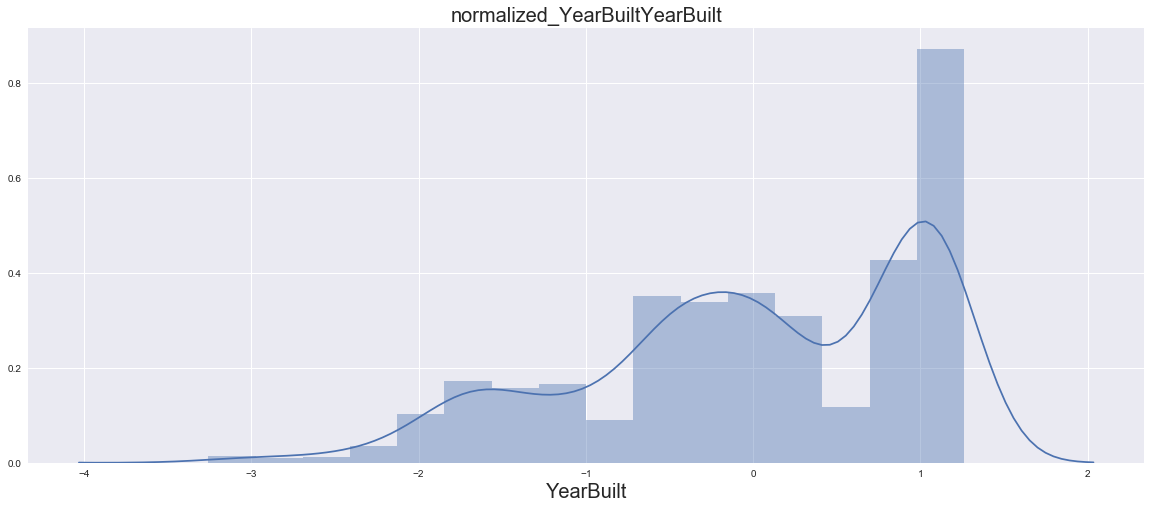

In [9]:
YearBuilt=train["YearBuilt"].reset_index().drop(["index"],axis=1)
normalized_YearBuilt=normalization(YearBuilt)
plt.figure(figsize=(20,8))
sns.distplot(normalized_YearBuilt)
plt.title("normalized_YearBuiltYearBuilt",fontsize=20)
plt.xlabel("YearBuilt",fontsize=20)


In [10]:
test_YearBuilt = test["YearBuilt"].reset_index().drop(["index"],axis=1)
test_YearBuilt

YearBuilt_mean = YearBuilt.mean()
YearBuilt_std = YearBuilt.std()

normalized_test_YearBuilt = (test_YearBuilt - YearBuilt_mean) /YearBuilt_std

### GrLivAreaとYearBuiltに関する散布図

GrLiveとYearBuiltに関しても散布図をプロットしておこう。(GrLiveArea_logの正規化前と正規化後)

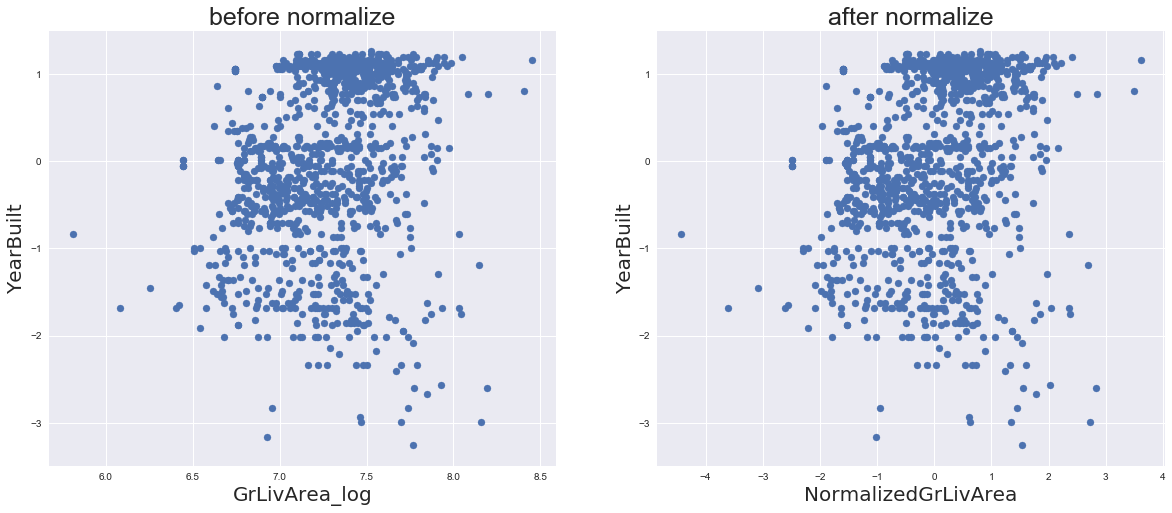

In [11]:
Sale_Gr_Year = pd.concat([Sales_and_Gr_log,normalized_YearBuilt],axis = 1)
normed_Sale_Gr_Year = pd.concat([Sales_and_Gr_normalized,normalized_YearBuilt],axis = 1)


plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title("before normalize",fontsize = 25)
plt.scatter("GrLivArea","YearBuilt",data=Sale_Gr_Year)
plt.xlabel('GrLivArea_log',fontsize = 20, fontdict={'family': 'IPAPGothic'})
plt.ylabel('YearBuilt',fontsize = 20, fontdict={'family': 'IPAPGothic'})


plt.subplot(1,2,2)
plt.title("after normalize",fontsize = 25)
plt.scatter("GrLivArea",'YearBuilt',data=normed_Sale_Gr_Year)
plt.xlabel('NormalizedGrLivArea',fontsize = 20, fontdict={'family': 'IPAPGothic'})
plt.ylabel('YearBuilt',fontsize = 20, fontdict={'family': 'IPAPGothic'})

説明変数用のデータと目的変数用のデータをわかりやすいように整形しておこう。

In [12]:
#  トレーニング用の説明変数とテスト用の目的変数
explain = pd.concat([normalized_GrLivArea_log,normalized_YearBuilt],axis=1)
target = normalized_SalePrice_log


#  テスト用の説明変数とテスト用の目的変数
test_explain = pd.concat([normalized_test_GrLivArea_log,normalized_test_YearBuilt],axis=1)
test_target = normalized_test_SalePrice_log

##  損失関数の実装

損失関数を実装していく。

In [13]:
## 動作確認済み(切片ありバージョンで)
## 特に、theta の行数は特徴量+1であることに注意

#  切片に対応する列を追加する計算
def add_segment(X):
    ones = np.ones(X.shape[0])
    ones=pd.DataFrame(ones)    #1167行1列
    ones = ones.rename(columns = { 0: "const"})
    X = pd.concat([ones,X],axis = 1)   
    return X
 

def inner_product(X,theta):
    return np.dot(X,theta) 


def compute_cost(X, Y, theta):    
    h = inner_product(X,theta)
    error = ((h - np.array(Y))**2).sum()/(len(Y)*2)
    return  error



In [14]:
def gradient_descent(X, y, theta, iterations, alpha):
    """
    勾配降下法の処理
    """
    theta = np.reshape(theta,(len(theta),1))
    past_costs = []
    past_thetas = []

    cost = compute_cost(X,y,theta)

    past_costs.append(cost)
    past_thetas.append(theta)

    for i in range(iterations):
        h = inner_product(X,theta)

        #  h が(1168,)行列なので、(1168,1)行列にreshape
        #  y は(1168,1)行列なのでそのまま
        #y=np.reshape(np.array(y),(len(h),1))    
        h = np.reshape(h,(len(h),1))

        #(3,1168)と(1168,1)で行列積をして (3,1)行列の　cost関数の微分ベクトルを求める。
        partial_cost = np.dot(X.T,(np.array(h)-y))
        

        theta = theta - (alpha/len(y))*partial_cost
       
        cost = compute_cost(X,y,theta)
        past_costs.append(cost)
        past_thetas.append(theta)
        
        
    Min_cost = min(past_costs)
    Min_theta_index = min(np.where(past_costs == Min_cost))
    Min_theta_index =  int(Min_theta_index)
    opt_theta = past_thetas[Min_theta_index]
    
    return past_costs,opt_theta,past_thetas,Min_cost

#  過去のcost関数の値の遷移のリスト、コスト関数が最小になる時のtheta、thetaの遷移、最小のコストの値を返す。

さて、各種関数の実装はできたので、実際に学習をさせてみよう。

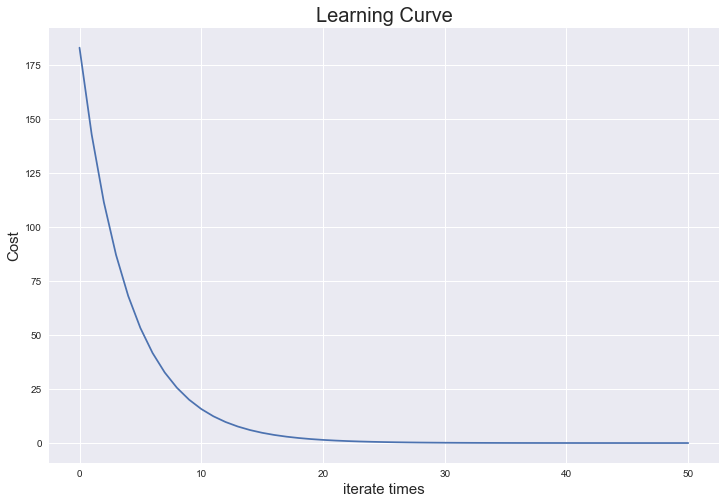

In [15]:
explain_seg = add_segment(explain)    # 勾配降下法へ投入するまえに、切片に相当する列を追加しておく。

rand = np.random.rand(explain.shape[1]+1) +10    #  thetaの初期値は乱数で生成。
plt.figure(figsize = (12,8))
plt.title("Learning Curve",fontsize =20)
plt.xlabel("iterate times",fontsize=15)
plt.ylabel("Cost",fontsize=15)
learning_curve = gradient_descent(explain_seg,target,rand,50,0.1)     
plt.plot(learning_curve[0])       # 関数の返り値のindex=0がcost関数の値の遷移


トレーニングデータに対する学習曲線とテストデータに対する学習曲線を重ねて描画してみる。

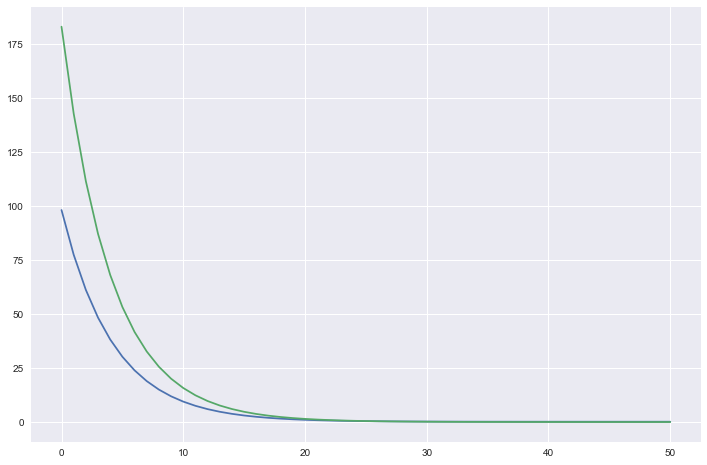

In [16]:
test_explain_seg = add_segment(test_explain)      # テスト用データに切片に相当する行を追加しておく。

test_costs =[]      # テスト用データを使ってcost関数を計算しなおした結果を格納するためのリスト

for i in learning_curve[2]:
    test_costs.append(compute_cost(test_explain_seg,test_target,i))     # 記録してあったthetaの値をしようして、テストデータに対してコストを計算

plt.figure(figsize=(12,8))
plt.plot(test_costs)
plt.plot(learning_curve[0])     

ちなみに、YearBuiltを正規化しないで、学習させると以下のような学習曲線になってしまう。

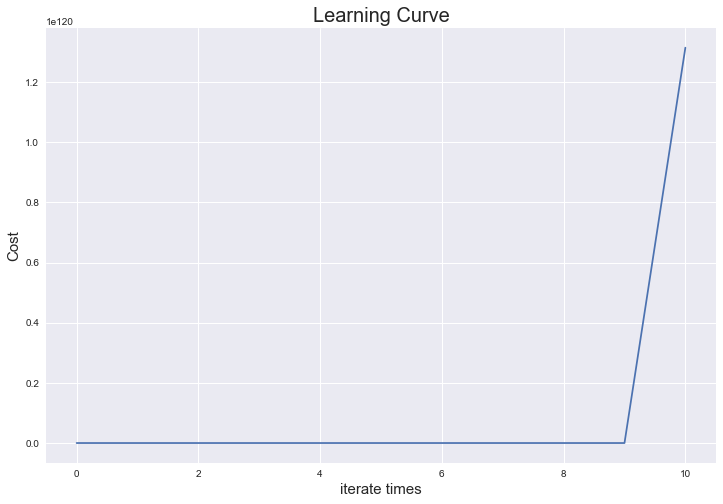

In [17]:
rand2 = np.random.rand(explain.shape[1]+1) +10
explain2= add_segment(pd.concat([normalized_GrLivArea_log,YearBuilt],axis=1))

plt.figure(figsize = (12,8))
plt.title("Learning Curve",fontsize =20)
plt.xlabel("iterate times",fontsize=15)
plt.ylabel("Cost",fontsize=15)
plt.plot(gradient_descent(explain2,target,rand2,10,0.1)[0])

## 線形回帰のクラス化

今まで作成した関数をクラス化する。

In [18]:
class LinearModel(): #theta, iterations, alpha):

    def add_segment(self):
        ones = np.ones(self.X.shape[0])
        ones=pd.DataFrame(ones)    
        ones = ones.rename(columns = { 0: "const"})
        self.X = pd.concat([ones,self.X],axis = 1)   
        return self.X                     
    

    
    def __init__(self,X,y):
        self.X = add_segment(X)          # 　インスタンス生成時に切片に対応する行を追加する。
        self.y = y           

    


    def inner_product(self):
        return np.dot(self.X,self.theta) 


    def compute_cost(self,theta): 
        self.init_theta = theta      # 初期値のthetaを保存しておく。
        self.theta = theta              # 更新していくthetaはこちら。
        h = inner_product(self.X,self.theta)
        self.error = ((h - np.array(self.y))**2).sum()/(len(self.y)*2)
        return  self.error


        
    def gradient_descent(self,iterations, alpha):
        """
        勾配降下法の処理
        """
        self.count = 0            # イテレーションやハイパーパラメーターを変えて何度も試したりするように、実行回数をカウントする用の変数を用意。
        
        self.past_cost_n = []
        self.past_thetas_n = []
        self.Min_costs = []
        self.opt_thetas = []
        
        if (self.count == 0):

            self.theta = np.reshape(self.theta,(len(self.theta),1))     # thetaのshape調整
            past_costs = []
            past_thetas = []

            # イテレーションや学習係数を修正するたびに初期化をしたくはないので、self.iterationやself.alphaという変数は用意しないことにする。

            cost = compute_cost(self.X,self.y,self.theta)

            past_costs.append(cost)
            past_thetas.append(self.theta)

            for i in range(iterations):
                h = inner_product(self.X,self.theta)

                #  h が(1168,)行列なので、(1168,1)行列にreshape
                #  y は(1168,1)行列なのでそのまま
                #y=np.reshape(np.array(y),(len(h),1))    
                h = np.reshape(h,(len(h),1))

                #(3,1168)と(1168,1)で行列積をして (3,1)行列の　cost関数の微分ベクトルを求める。
                partial_cost = np.dot(self.X.T,(np.array(h)-self.y))


                self.theta = self.theta - (alpha/len(self.y))*partial_cost

                cost = compute_cost(self.X,self.y,self.theta)
                past_costs.append(cost)
                past_thetas.append(self.theta)


                
            self.past_cost_n.append(past_costs)
            self.past_thetas_n.append(past_thetas)
            self.Min_costs.append(min(self.past_cost_n[self.count]))
            
            
            Min_theta_index = min(np.where(self.past_cost_n[self.count] == self.Min_costs[self.count]))
            Min_theta_index =  int(Min_theta_index)
            self.opt_thetas.append(past_thetas[Min_theta_index])

            self.count += 1

            return plt.plot(past_costs)

                  

        else:
            self.theta = init_theta
            self.theta = np.reshape(self.theta,(len(self.theta),1))     # thetaのshape調整
            past_costs = []
            past_thetas = []

            # イテレーションや学習係数を修正するたびに初期化をしたくはないので、self.iterationやself.alphaという変数は用意しないことにする。

            cost = compute_cost(self.X,self.y,self.theta)

            past_costs.append(cost)
            past_thetas.append(self.theta)

            for i in range(iterations):
                h = inner_product(self.X,self.theta)

                #  h が(1168,)行列なので、(1168,1)行列にreshape
                #  y は(1168,1)行列なのでそのまま
                #y=np.reshape(np.array(y),(len(h),1))    
                h = np.reshape(h,(len(h),1))

                #(3,1168)と(1168,1)で行列積をして (3,1)行列の　cost関数の微分ベクトルを求める。
                partial_cost = np.dot(self.X.T,(np.array(h)-self.y))


                self.theta = self.theta - (alpha/len(self.y))*partial_cost

                cost = compute_cost(self.X,self.y,self.theta)
                past_costs.append(cost)
                past_thetas.append(self.theta)


            

            self.past_cost_n.append(past_costs)
            self.past_thetas_n.append(past_thetas)
            self.Min_costs.append(min(self.past_cost_n[self.count]))
            
            
            Min_theta_index = min(np.where(self.past_cost_n[self.count] == self.Min_costs[self.count]))
            Min_theta_index =  int(Min_theta_index)
            self.opt_thetas.append(past_thetas[Min_theta_index])

            plt.plot(past_costs_n[count])
            self.count += 1

            return 0
 

                  

          
        
#      わざわざ関数化する必要がない。.attributeで呼び出せる
#     def Min_cost():
#         return self.Min_cost

#     def past_costs():              
#         return self.past_costs

#     def past_thetas():
#         return self.past_thetas
                  
#     def optimized_theta():
#         return self.opt_theta
                  
#  過去のcost関数の値の遷移のリスト、コスト関数が最小になる時のtheta、thetaの遷移、最小のコストの値を返す。


クラス化した関数が動作するかいくつか確認をしてみよう

In [19]:
Linear1= LinearModel(explain,target)

In [21]:
init_theta = np.random.rand(explain.shape[1]+1)
Linear1.compute_cost(init_theta)

1432.6098041537568

In [22]:
Linear1.X

,const,GrLivArea,YearBuilt
0,1.0,0.474778,1.031423
1,1.0,-0.967134,0.212878
2,1.0,-0.005814,-0.245507
3,1.0,-0.410637,1.096906
4,1.0,1.142672,1.129648
5,1.0,1.405926,0.180136
6,1.0,1.575140,0.834972
7,1.0,1.853034,0.180136
8,1.0,-0.943745,-1.620663
9,1.0,-0.117056,-1.686146


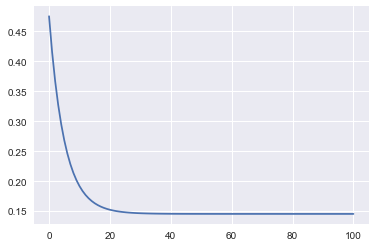

In [23]:
Linear1.gradient_descent(100,0.1)

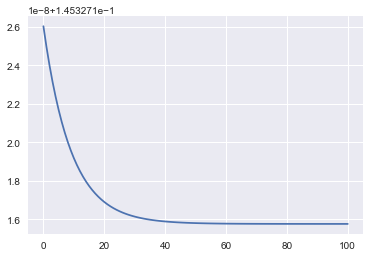

In [24]:
Linear1.gradient_descent(100,0.07)

##  勾配降下法における更新式の導出

####  問題 :  $ \theta _j := \theta_j - \frac{\partial}{\partial \theta_j}  J(\theta)$ から、これを実際に書き下した式、

$$
\theta_j :=  \theta_j  - \alpha \frac{1}{m} \sum_{i=1}^{m}  (  h_{\theta} (x_i)  - y_i )x_j  
$$

を導け。


####  導出

$J(\theta)$の偏微分が、

\begin{align}
\frac{\partial}{\partial \theta_j}  J(\theta)  &= \frac{\partial}{\partial \theta_j} \frac{1}{2m} \sum_{i=1}^{m}  \big( h_{\theta} (x_i)  - y_i \big) ^2  \\
   &= \frac{1}{m}  \sum_{i=1}^{m}   ( h_{\theta} (x_i)  - y_i)   \frac{\partial}{\partial \theta_j} \big( h_{\theta} (x_i)  - y_i \big)  \\
   &= \frac{1}{m}  \sum_{i=1}^{m}   ( h_{\theta} (x_i)  - y_i)  \, x_j
\end{align}

であるから、この$\frac{\partial}{\partial \theta_j}  J(\theta)$をつかって$\theta_j - \frac{\partial}{\partial \theta_j}  J(\theta)$を書き下せば導かれたことになる。


## 勾配降下法において局所解に陥る場合

勾配降下法においては、$\frac{\partial}{\partial \theta_j}  J(\theta) \,\, (j=1,2,\dots ,m)$が$0$になる方向へ$\theta$を更新する。しかし、極小だからといって最小ではない、つまり
$\frac{\partial}{\partial \theta_j}  J(\theta) = 0 \,\, (j=1,2,\dots ,m) $でだからといって、その解となる点$\theta_0$が最小をとる点とは限らず、その$\theta_0$に更新が止まってしまう可能性がある。

## 線形回帰の場合には局所最適解にはならない

勾配降下法で最適解を探索しても、局所最適に陥ることはない。

なぜなら、コスト関数が凸関数だからである。

$J(\theta)$の式において、$\sum$の中身が凸関数だからである。(証明は時間の関係などで省略。)

また一方で、凸関数の和は凸関数なので、総合して$J(\theta)$は凸関数となる。

凸関数の場合には、極小解が最小解になる。

## 機械学習に関する前提知識

### 教師あり学習

教師あり学習というのは、「未知のデータを予測するためのルール」(=つまりモデル)をつくる際に、まずは既に手元にあり正解がわかっているデータを用いて、モデルを学習させる学習方法のことである。

教師あり学習自体も大きく二つに分類される。

- 分類問題
未知の新しいデータが与えられたときに、そのデータが、あらかじめ設定している有限個の集合のどこに属するか決定する問題を分類問題という。

いくつか例を挙げるのであれば、飛行機の乗客が「生存するかどうかを判定」する問題や、クレジットカードの顧客が「遅延をしないかどうか」、花に関する特徴(長さや花びらの大きさ、重さなどなど)を与えられそれらから花の種類を判定する問題、ある人に関する情報、例えば年収や住んでいる地域、家賃などの情報を与えられたときにその人の職業を判定したり、国籍を判定したりする問題のことである。


- 回帰問題

未知の新しいデータが与えられたときに、連続値を予測問題を回帰問題という。

例えば、不動産に関する諸々の情報を与えられたときに、その不動産の価格を予測する問題。ある国に関する情報が与えられたとき、なんらかの経済指数を予測する問題。ある人の年収を予測する問題などがある。


### 教師なし学習

教師なし学習というのは、与えられたデータ群からなんらかの規則に基づいてデータを予測する方法である。教師なし学習においては、予め正解は与えられておらず、手元のデータ群から、「未知のデータが与えられたときにどう予測するか」というルールそのものを学習する。

例えば、脳波の形状から法則性を見出し何らかの意味を抽出したり、動物の声を分類したりすることである。

###  半教師あり学習

半教師あり学習というのは、教師ありと教師なしを合わせたような技法である。

これも大きく二種類あるようである。

- まず少数のラベルつきデータでモデルを学習させ、さらにそのモデルをつかって未知のデータを分類し、分類したデータのうち特に信頼性が高いものを、新たに教師データとして追加して学習を進める方法

- 教師なし学習で学習したモデルをつかって未知のデータにラベルをつける。そのラベルがつけられたデータでさらに教師あり学習をさせる。

現実的な状況では、学習に必要な十分な数のデータが手に入れられなかったり、手に入れられたとしても教師ラベルをつけるのが著しく手間になることも十分にありうるためこうした手法は有効である。


###  強化学習

教師あり学習でも、教師なし学習でもない学習方法に強化学習がある。

強化学習については、今までの教師あり学習や教師なし学習とは違い、データ自体をモデルが自分で獲得していく。

特に、報酬と呼ばれる何らかの関数が設定し、モデルはその報酬が最大になるように自らの行動を最適化していく。

特に、「まだ行なっていない行動」のなかにももしかしたら報酬をより大きくする可能性があるものがあるかもしれないので、目先の報酬が低くなってしまうリスクがあるとしても一定の割合でまだ行なっていない行動も行なったりもする。



##  フューチャースケーリング

#### 正規化とは

手元のデータ$x_i \,\,(i =1,2, \dots ,n)$について、その平均を$\mu$、分散を$\sigma$とする。

このとき、

$$
z_i = \frac{x_i - \mu}{\sigma}
$$
と変換することを正規化という。


#### 標準化とは

手元のデータ$x_i \,\,(i =1,2, \dots ,n)$について、
$$
z_i = \frac{x_i - x_{min}}{x_{max} - x_{min}}
$$

と変換することを、標準化という。

####  正規化と標準化の使い分け

正規化を行う場合には、前提としてもとのデータが正規分布に従っていることを仮定している。

一方で標準化の場合には、もとのデータが一様分布に従っていることを仮定している。

したがって、操作をする前にそれらの仮定をどの程度満たしているか確認しなければならない。

####  フューチャースケーリングをすることのメリット

単位系や次元が違うもの同士でも比較ができるようになる。

## $\theta_0$(切片)の役割

$h_{\theta} (x)=  \theta_0 x_0 + \theta_1 x_1 + \dots  +\theta_n x_n  \,\, (x_0 = 1)$ の式において、切片$\theta_0$を付け加えている理由としては、線形回帰の表現力をあげるためである。

もし、$\theta_0$がないとすると、暗黙のうちに(暗黙かどうかは微妙ですが)、「原点を通る超平面のなかで」もっともよく目的変数を説明できる超平面をみつける、問題を解くことになってしまう。つまり、「原点を通る超平面のうちで」という制約がついてしまうのである。

当然、その制約のもとで適切な超平面を探すのと、制約なしで超平面をさがすのでは、制約なしのほうが表現力があがるのは明らかである。

これが、切片$\theta_0$を仮定する理由である。

## 機械学習における学習

### 学習率

学習率を比較的大きく設定すると、更新する幅が大きいためなかなかなかなか最適解に収束しない可能性がある。

更新回数はどんなに大きくても高々有限なので、その有限回の間ではUnderfitしたままの可能性が十分ありうる。

一方で学習率を小さく設定すると、一度極小点にはまってしまうとなかなか抜け出すことが難しくなってしまう。また、正しい方向へ向かっているにしても、更新幅が小さいので、最適なところまで辿りつけなずUnderfitのまま終わってしまう可能性がある。


### 学習曲線

学習曲線とはモデルの性能を評価する際に用いられる。

学習曲線の様子をみることによって、Overfitをしているのか(過学習)、もしくはUnderfit(そもそも学習できていない)なのかを判断することができる。



### 正規方程式

$\frac{\partial}{\partial \theta_j}  J(\theta)  =0 \,\, (j=1,2,3, \dots , n)$を書き下した式
$$
   \left(
    \begin{array}{c}
     \frac{\partial}{\partial \theta_1}  J(\theta)\\
     \frac{\partial}{\partial \theta_2}  J(\theta) \\
      \vdots \\
      \frac{\partial}{\partial \theta_n}  J(\theta)
    \end{array}
  \right)　 =0
$$

は、少し面倒な計算をすることによって、$X^{T}X \theta = X^{T} y$  (ただし、$X^{T}$はデータ数$n$、特徴量の数を$m$として$(n,m+1)$行列)を満たす$\theta$を求めることと同値である

正規方程式を解く方法のメリットとしては、以下のようなことがある。

- 勾配降下法のように適切な学習係数を探る必要がない(方程式を(まさに機械的に)とくだけなので)。
- 思考錯誤が不要。つまり方程式が解くことができる場合には、その方程式をとけばそれで終わり。

一方で正規方程式をとく方法のデメリットとしては以下が考えられる。

- $X^{T}X$の逆行列を求める必要があるので、サイズが大きくなると計算量が増える。もしくは逆行列がそもそも存在しない。

勾配降下法について概ね、上記メリット・デメリットの逆になる。

#### メリット

- 特徴量の数が増えても速度が落ちにくい

#### デメリット

- 学習係数を決める必要がある。
- 局所解に陥ったり、学習が収束しないことなどを避けるため何度か実行する必要がある。